## Import Libraries


In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [6]:
model = tf.keras.models.load_model('trained_model.keras')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizing Single Image of Test set

In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


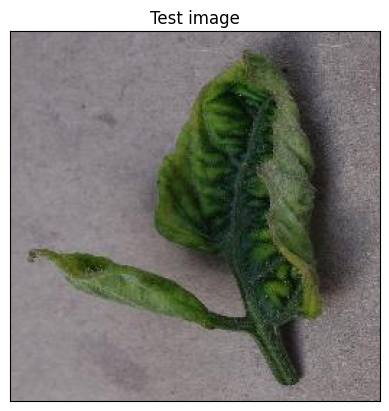

In [58]:
import cv2
image_path = "test/test/TomatoYellowCurlVirus3.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # convert BGR into RGB

#Display Image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

##  Testing Modal

In [59]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [60]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 95ms/step


(array([[2.0547221e-04, 8.0819686e-05, 2.9130779e-06, 2.0256321e-05,
         2.4268184e-05, 1.9226196e-04, 4.8589143e-03, 3.2185770e-05,
         8.0921879e-04, 3.2585512e-03, 2.0568778e-03, 9.0706982e-03,
         9.7238320e-01, 6.9751902e-03, 2.9227072e-05]], dtype=float32),
 (1, 15))

In [61]:
result_index = np.argmax(prediction)
result_index

12

In [62]:
class_name = ['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

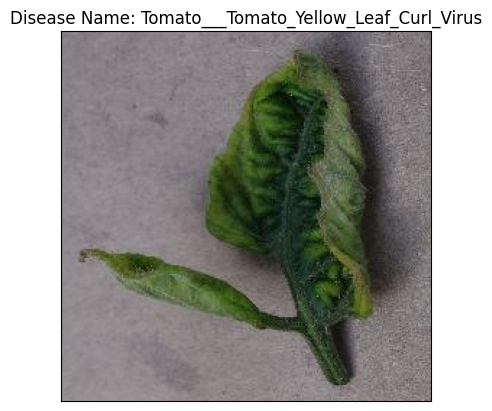

In [63]:
#Displaying Result for disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [64]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'